# Exploratory Text Analysis through TF-IDF


In [27]:
from text_analyzer import read_sonnets, clean_corpus, tf, get_top_k, idf, tf_idf, cosine_sim

import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# Run text_analyzer.py with default arguments
!python text_analyzer.py


Sonnet 1 TF (Top 20):
[('the', 6), ('thy', 5), ('to', 4), ('n', 3), ('and', 3), ('that', 2), ('might', 2), ('but', 2), ('by', 2), ('his', 2), ('tender', 2), ('thou', 2), ('thine', 2), ('own', 2), ('self', 2), ('worlds', 2), ('from', 1), ('fairest', 1), ('creatures', 1), ('we', 1)]

Corpus TF (Top 20):
[('and', 491), ('n', 461), ('the', 430), ('to', 408), ('my', 397), ('of', 372), ('i', 341), ('in', 324), ('that', 320), ('thy', 287), ('thou', 235), ('with', 181), ('for', 171), ('a', 166), ('but', 163), ('is', 163), ('not', 162), ('love', 148), ('so', 133), ('me', 131)]

Corpus IDF (Top 20):
[('desiring', 5.0369526024136295), ('faten', 5.0369526024136295), ('arisingn', 5.0369526024136295), ('gaten', 5.0369526024136295), ('lark', 5.0369526024136295), ('criesn', 5.0369526024136295), ('outcast', 5.0369526024136295), ('possessedn', 5.0369526024136295), ('despisingn', 5.0369526024136295), ('bringsn', 5.0369526024136295), ('bootless', 5.0369526024136295), ('beweep', 5.0369526024136295), ('dea

## a. Read about argparse.
Look at its implementation in the Python Script. Follow the instruction and answer the questions in the Argparse section.

Argparse is a Python library that makes it easier to run a script from the command line with named options and defaults. In this script, argparse is used to define inputs like the target document (`--input`) and the corpus folder (`--corpus`) so the same code can be reused without editing the file each time.

Each argument includes a type, a default value, and a help string, which makes the script more readable and less error-prone. When the script runs, `parser.parse_args()` collects the values provided by the user (or falls back to defaults) and stores them in `args`, which the rest of the program uses to load files and compute TF, IDF, and TF-IDF results.

## b. Read and Clean the data

In [29]:
d_corpus='data/shakespeare_sonnets/'

# return dictionary with keys corresponding to file names and values being the respective contents
corpus = read_sonnets(d_corpus)

# return corpus (dict) with each sonnet cleaned and tokenized for further processing
corpus = clean_corpus(corpus)

In [30]:
corpus['1']

['n',
 'From',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increasen',
 'That',
 'thereby',
 'beautys',
 'rose',
 'might',
 'never',
 'dien',
 'But',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'deceasen',
 'His',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memoryn',
 'But',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyesn',
 'Feedst',
 'thy',
 'lights',
 'flame',
 'with',
 'selfsubstantial',
 'fueln',
 'Making',
 'a',
 'famine',
 'where',
 'abundance',
 'liesn',
 'Thy',
 'self',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'crueln',
 'Thou',
 'that',
 'art',
 'now',
 'the',
 'worlds',
 'fresh',
 'ornamentn',
 'And',
 'only',
 'herald',
 'to',
 'the',
 'gaudy',
 'springn',
 'Within',
 'thine',
 'own',
 'bud',
 'buriest',
 'thy',
 'contentn',
 'And',
 'tender',
 'churl',
 'makst',
 'waste',
 'in',
 'niggardingn',
 'Pity',
 'the',
 'world',
 'or',
 'else',
 'this',
 'glutton',
 'ben',
 'To',
 'eat',
 'the',
 'worlds',
 'due',
 'by',
 'the'

## c. TF

In [31]:
# assign 1.txt to variable sonnet to process and find its TF (Note corpus is of type dic, but sonnet1 is just a str)
sonnet1 = corpus['1']

# determine tf of sonnet
sonnet1_tf = tf(sonnet1)

# get sorted list and slice out top 20
sonnet1_top20 = get_top_k(sonnet1_tf)
# print
# print("Sonnet 1 (Top 20):")
df = pd.DataFrame(sonnet1_top20, columns=["word", "count"])
df.head(20)

,word,count
0,the,6
1,thy,5
2,to,4
3,n,3
4,and,3
5,that,2
6,might,2
7,but,2
8,by,2
9,his,2


In [32]:
# TF of entire corpus
flattened_corpus = [word for sonnet in corpus.values() for word in sonnet]
corpus_tf = tf(flattened_corpus)
corpus_top20 = get_top_k(corpus_tf)
# print
# print("Corpus TF (Top 20):")
df = pd.DataFrame(corpus_top20, columns=["word", "count"])
df.head(20)

,word,count
0,and,491
1,n,461
2,the,430
3,to,408
4,my,397
5,of,372
6,i,341
7,in,324
8,that,320
9,thy,287


### Q: Discussion
Do you believe the most frequent words would discriminate between documents well? Why or why not? Any thoughts on how we can improve this representation? Does there appear to be any ‘noise’? If so, where? If not, it should be clear by the end of the assignment.

The most frequent words usually do not discriminate between documents very well because they tend to be common function words that appear everywhere, such as “the,” “and,” or “to.” Those words carry grammatical structure, but they do not tell you much about what makes one sonnet distinct from another.

A better representation is to reduce the impact of extremely common words and emphasize words that are frequent in one document but less frequent across the whole corpus. That is exactly what TF-IDF is designed to do. There is also visible “noise” in raw TF results because common stopwords dominate the top of the list, and capitalization or minor text formatting differences can introduce duplicates unless text is normalized consistently.

## d. IDF

In [33]:
# IDF of corpus
corpus_idf = idf(corpus)
corpus_tf_ordered = get_top_k(corpus_idf)
# print top 20 to add to report
df = pd.DataFrame(corpus_tf_ordered, columns=["word", "score"])
df.head(20)

,word,score
0,bootless,5.036953
1,criesn,5.036953
2,gaten,5.036953
3,scorn,5.036953
4,despisingn,5.036953
5,lark,5.036953
6,enjoy,5.036953
7,arisingn,5.036953
8,possessedn,5.036953
9,curse,5.036953


### Q: observe and briefly comment on the difference in top 20 lists (comparing TF of corpus vs its IDF).

The top words from corpus TF and the top words from corpus IDF are different because they measure different things. TF highlights words that appear the most overall, which tends to favor common words that show up in almost every sonnet.

IDF highlights the opposite: words that appear in fewer documents receive higher IDF scores, because they are more “informative” or unique to a smaller subset of the corpus. In other words, TF finds what is common across the corpus, while IDF rewards what is rare across the corpus.

## e. TF-IDF

In [34]:
# TFIDF of Sonnet1 w.r.t. corpus
sonnet1_tfidf = tf_idf(corpus_idf, sonnet1_tf)
sonnet1_tfidf_ordered = get_top_k(sonnet1_tfidf)
# print
# print("Sonnet 1 TFIDF (Top 20):")
df = pd.DataFrame(sonnet1_tfidf_ordered, columns=["word", "score"])
df.head(20)

,word,score
0,worlds,7.301316
1,tender,6.490386
2,thereby,5.036953
3,heir,5.036953
4,feedst,5.036953
5,lights,5.036953
6,selfsubstantial,5.036953
7,fueln,5.036953
8,famine,5.036953
9,foe,5.036953


### Q. What is different with this list than just using TF?

TF-IDF is different from TF because it downweights words that appear in many documents and upweights words that are more specific to a smaller number of documents. With TF alone, the most common words tend to dominate even if they do not help distinguish the sonnet.

With TF-IDF, the top words shift toward terms that are more representative of the sonnet’s specific content. This makes TF-IDF a better feature representation for comparing documents because it reduces the influence of generic words and emphasizes words that carry more distinguishing information.


## f. Compare all documents

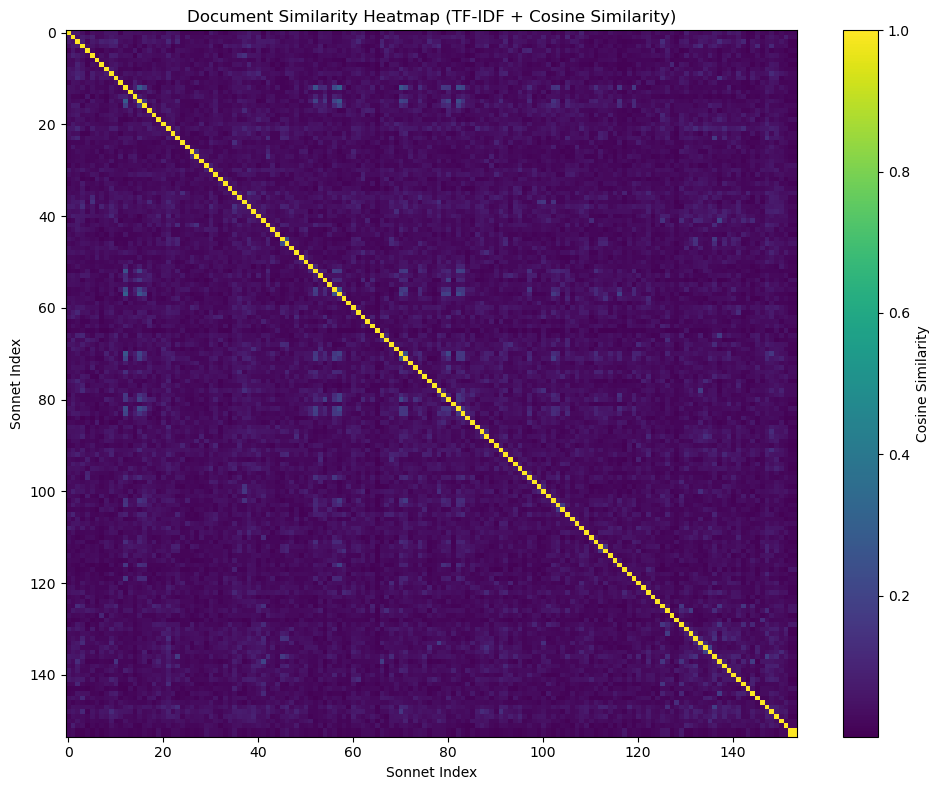

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Compute IDF once for the full corpus
corpus_idf = idf(corpus)

# 2) Build TF-IDF vectors for every sonnet
sonnet_ids = sorted(corpus.keys(), key=lambda x: int(x) if x.isdigit() else x)
tfidf_vectors = {}

for sid in sonnet_ids:
    tf_vec = tf(corpus[sid])
    tfidf_vectors[sid] = tf_idf(corpus_idf, tf_vec)

# 3) Create cosine similarity matrix
n = len(sonnet_ids)
sim_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        sim_matrix[i, j] = cosine_sim(tfidf_vectors[sonnet_ids[i]], tfidf_vectors[sonnet_ids[j]])

# 4) Plot heatmap (matplotlib only)
plt.figure(figsize=(10, 8))
plt.imshow(sim_matrix, aspect='auto')
plt.colorbar(label="Cosine Similarity")
plt.title("Document Similarity Heatmap (TF-IDF + Cosine Similarity)")
plt.xlabel("Sonnet Index")
plt.ylabel("Sonnet Index")
plt.tight_layout()
plt.show()

### Q. Observe the heatmap. What insight do you get from it?

The heatmap shows which sonnets are most similar to each other based on TF-IDF features. Darker or higher-valued regions indicate pairs of sonnets that share more distinctive vocabulary, while lighter regions indicate sonnets with more different word usage.

If there are visible clusters or blocks, that suggests groups of sonnets share similar themes or repeated language patterns, which could reflect shared subject matter or style. If most values are low and evenly spread, that suggests the sonnets are relatively distinct from each other in terms of their distinguishing terms, or that the chosen preprocessing is emphasizing uniqueness more than overlap.